#Train the model

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import keras
import numpy as np
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.applications import MobileNet
from sklearn.metrics import confusion_matrix
from keras.layers.core import Dense, Activation
from keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [30]:
x_train = train_datagen.flow_from_directory("/content/drive/MyDrive/img/train", target_size=(64,64),batch_size=8,
                                            class_mode='categorical', color_mode ="grayscale")

Found 594 images belonging to 6 classes.


In [31]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/img/test", target_size=(64,64),batch_size=8,
                                         class_mode='categorical', color_mode ="grayscale")

Found 30 images belonging to 6 classes.


In [32]:
len(x_train)

75

In [33]:
len(x_test)

4

In [34]:
x_train.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

In [36]:
#Creating the model
model=Sequential()
#Adding the layers
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#adding hidden layers
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))

#Adding the output layer
model.add(Dense(9, activation='softmax'))


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.add(Dense(units=512 , activation='relu'))
model.add(Dense(units=6, activation='softmax')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_10 (Dense)            (None, 400)               12301200  
                                                                 
 dense_11 (Dense)            (None, 200)               80200     
                                                                 
 dense_12 (Dense)            (None, 100)               20100     
                                                      

In [39]:
model.fit_generator(x_train,
                    steps_per_epoch = len(x_train) , 
                    epochs = 25, 
                    validation_data = x_test,
                    validation_steps = len(x_test))

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


75/75 [==============================] - 10s 119ms/step - loss: 1.8024 - accuracy: 0.1347 - val_loss: 1.7936 - val_accuracy: 0.1667
Epoch 2/25
75/75 [==============================] - 9s 120ms/step - loss: 1.8003 - accuracy: 0.1313 - val_loss: 1.7936 - val_accuracy: 0.1667
Epoch 3/25
75/75 [==============================] - 8s 110ms/step - loss: 1.7982 - accuracy: 0.1515 - val_loss: 1.7928 - val_accuracy: 0.1667
Epoch 4/25
75/75 [==============================] - 8s 110ms/step - loss: 1.7971 - accuracy: 0.1667 - val_loss: 1.7924 - val_accuracy: 0.1667
Epoch 5/25
75/75 [==============================] - 8s 110ms/step - loss: 1.7985 - accuracy: 0.1566 - val_loss: 1.7926 - val_accuracy: 0.1667
Epoch 6/25
75/75 [==============================] - 8s 110ms/step - loss: 1.7966 - accuracy: 0.1431 - val_loss: 1.7925 - val_accuracy: 0.1667
Epoch 7/25
75/75 [==============================] - 8s 110ms/step - loss: 1.7979 - accuracy: 0.1582 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 8/25
75/75

In [44]:
model.save('gas.h5')

#test the model

In [40]:
inputs = keras.Input(shape=(64,))
outputs = keras.layers.Dense(1)(inputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="mean_squared_error")

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model = load_model("gas.h5")

In [47]:

path = r'/content/drive/MyDrive/img/test/2/0.jpg' 

In [48]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [52]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/img/test',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 30 images belonging to 6 classes.


In [51]:
train_datagen=ImageDataGenerator(rescale=1./255)
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/img/train',target_size=(64,64),class_mode='categorical',batch_size=100)

Found 594 images belonging to 6 classes.


Populating the interactive namespace from numpy and matplotlib


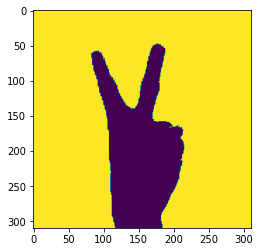

In [53]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgs = mpimg.imread(path)
imgplot = plt.imshow(imgs)
plt.show()

In [61]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

from keras_preprocessing.image import load_img

In [56]:
from keras.preprocessing import image

In [65]:
model = load_model('/content/gas.h5')

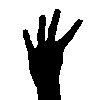

In [66]:
img = image.load_img('/content/drive/MyDrive/img/test/4/3.jpg',target_size = (100,100))
img

In [64]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [67]:
img = image.load_img(path,
                     color_mode='grayscale',
                     target_size= (64,64))
x = image.img_to_array(img)#image to array
x.shape

(64, 64, 1)

In [68]:
type(x)

numpy.ndarray

In [69]:
x = np.expand_dims(x,axis = 0)

In [70]:
x.shape

(1, 64, 64, 1)

In [87]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['0','1','2','3','4','5']
    print("THE PREDICTED GESTURE IS ",op[pred])

In [ ]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [81]:
model = Sequential()


# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))





In [83]:
img=image.load_img("/content/drive/MyDrive/img/test/5/0.jpg")
detect(img)

1/1 [==============================] - 0s 35ms/step
THE PREDICTED GESTURE IS  5


In [84]:
pred = model.predict(x)
pred

1/1 [==============================] - 0s 34ms/step


array([[[[1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         ...,
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00]],

        [[1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1.0000000e+00],
         [1.5304840e-07, 9.2541071e-05, 9.9179196e-01, 9.9522537e-01,
          4.6238687e-02, 1

In [85]:
img=image.load_img("/content/drive/MyDrive/img/test/0/1.jpg")
detect(img)

1/1 [==============================] - 0s 30ms/step
THE PREDICTED GESTURE IS  5


In [89]:
img=image.load_img("/content/drive/MyDrive/img/test/3/0.jpg")
detect(img)

1/1 [==============================] - 0s 30ms/step
THE PREDICTED GESTURE IS  5
